# Load Libaraies 

In [55]:
# Set up libraries 
import pandas as pd 
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Used to display multi outputs in jupyter notebook
from IPython.display import display

# Get stats 
from scipy import stats 

# Feature Selection and Model building libs 
from sklearn import linear_model as lm
from sklearn.metrics import accuracy_score as acc


# Load Train and Test dataset

In [13]:
# train data set
train = pd.read_csv('train.csv')

# test data set 
test = pd.read_csv('test.csv')

##### Get description of both Train and Test data 

In [9]:
# Train 
train.describe().T

,count,mean,std,min,25%,50%,75%,max
proprietary,2693.0,0.324545,0.468292,0.000000,0.000000,0.000000,1.000000,1.000000
opeid,2693.0,14784.614556,14469.923473,1003.000000,2835.000000,7469.000000,25561.000000,42636.000000
agemedian,2693.0,0.308698,0.098491,0.003899,0.259259,0.304094,0.360624,0.639376
cdr2014_log,2693.0,0.475850,0.173570,0.000000,0.373287,0.505327,0.607430,1.000000
cdr2015_log,2693.0,0.468387,0.169125,0.000000,0.365407,0.492322,0.596661,0.933477
cdr2016_log,2693.0,0.512933,0.181014,0.000000,0.404582,0.534291,0.650473,1.000000
cohort2014_log,2693.0,0.485772,0.130627,0.091722,0.379317,0.485915,0.581904,0.874803
cohort2015_log,2693.0,0.492706,0.128727,0.117059,0.385413,0.488904,0.587169,0.863965
cohort2016_log,2693.0,0.446601,0.141957,0.027338,0.328346,0.439811,0.549526,0.846799
density_log,2693.0,0.649596,0.098480,0.319762,0.584375,0.644864,0.705107,0.952287


In [4]:
# Get data Type 
test.describe().T

,count,mean,std,min,25%,50%,75%,max
proprietary,898.0,0.307350,0.461653,0.000000,0.000000,0.000000,1.000000,1.000000
opeid,898.0,13954.781737,14246.942324,1009.000000,2535.750000,6327.500000,23564.750000,42355.000000
agemedian,898.0,0.305498,0.093135,0.027290,0.255848,0.300195,0.356725,0.639376
cdr2014_log,898.0,0.478684,0.174417,0.000000,0.365407,0.509494,0.613898,0.791021
cdr2015_log,898.0,0.473406,0.165170,0.000000,0.365407,0.505327,0.602112,0.791021
cdr2016_log,898.0,0.515444,0.180575,0.000000,0.413058,0.538006,0.656520,0.887612
cohort2014_log,898.0,0.492638,0.128135,0.091722,0.390518,0.500224,0.588465,0.872097
cohort2015_log,898.0,0.498704,0.125786,0.175588,0.392980,0.504105,0.592690,0.862996
cohort2016_log,898.0,0.451308,0.140248,0.080517,0.336029,0.454680,0.554769,0.848925
density_log,898.0,0.654575,0.094395,0.328811,0.590862,0.645332,0.711043,0.949305


##### Set Target Varibale
cdr2016_log 

In [66]:
# Traget Variable  
y = train['cdr2016_log']

# Feature Matrix 

# get variables 
X_vars = list(train.columns)

# Get Variable to name 
X_vars.remove('cdr2016_log')
X_vars.remove('opeid')

# Set X 
X = train[X_vars]

# Vraiable Selection 

[Feature Selection Algorithms as One of the Python Data Analytical Tools](https://search-proquest-com.nuls.idm.oclc.org/docview/2380160621/fulltextPDF/4D88A98BAF5B42DFPQ/1?accountid=25320)

Pilnenskiy, N., & Smetannikov, I. (2020). Feature selection algorithms as one of the python data analytical tools. Future Internet, 12(3), 54. doi:http://dx.doi.org.nuls.idm.oclc.org/10.3390/fi12030054


For a given dataset D with M objects described with feature set F, |F| = N we need to find some optimal subset of features F*, F* ⊆ F in terms of some optimization of C criteria.

#### 1. Wrapper Method 
    Wrappers try to build optimal feature subset by the evaluation of the quality measure Qc for the predefined machine learning algorithm:

    F* = argmax Qc(F'),
        F'⊆ F
        
    where C is a machine learning model and Q is the quality measure for the model. For this, a wrapper algorithm works iteratively; on each step, it takes some feature subset and passes it to the model and then, depending on the model quality, it decides to pick another subset or stop the process. The picking procedure and the optimization stopping criteria basically define the wrapper algorithm. The main problem of this approach is that it is too slow for high-dimensional datasets as the number of possible subsets is equal to 2N and on each step we need to build a model to evaluate the subset quality.
    
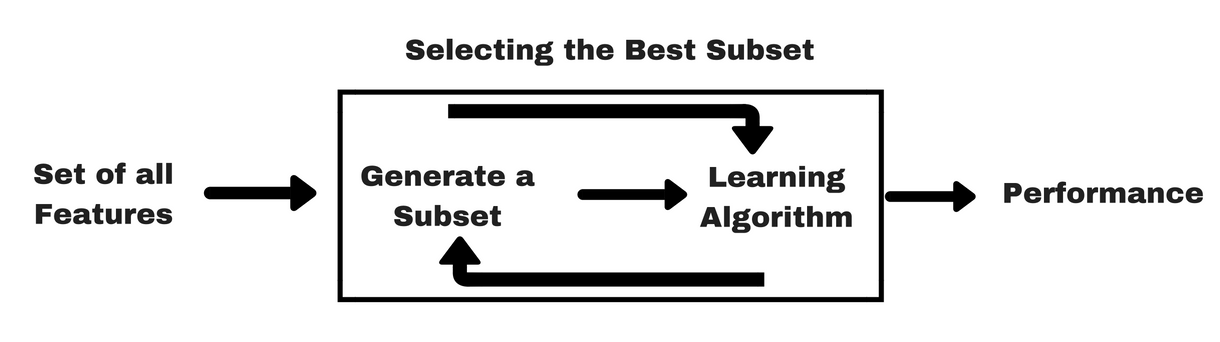
    
#### 2. Embedded Method
    Embedded methods usually use some intrinsic properties of the classifier to get features subset. Feature selection with random forest [16] is an illustrative example of such approach, where the out of bag error for each feature on each tree is aggregated into resulting feature scores and features that most often result in the elimination of bad classification results. Some of these methods can work even with really high-dimensional data, but their main restriction is the model itself. Basically, features that were selected with one model can result in bad performance if they are used for another model.

#### 3. Filter Method
    Filters are the third traditional group of feature selection algorithms. Instead of evaluating the feature sets with some models, they take into consideration only intrinsic properties of the features themselves. If a filter does not consider any dependencies between features themselves, thus assuming that they are independent, it is called univariate, otherwise it is multivariate. For multivariate filters, the problem is stated as follows:

    F* = argmax µ(F'),
        F'⊆ F
        
    where µ is the feature subset quality measure. On the other hand, for the univariate filters, the feature selection problem is stated without optimization. Instead, every feature is evaluated with featur quality measure µ (which for this case should be defined only on fi ∈ F, but not for the whole set of features subsets) and then some cutting rule κ is applied.
    
 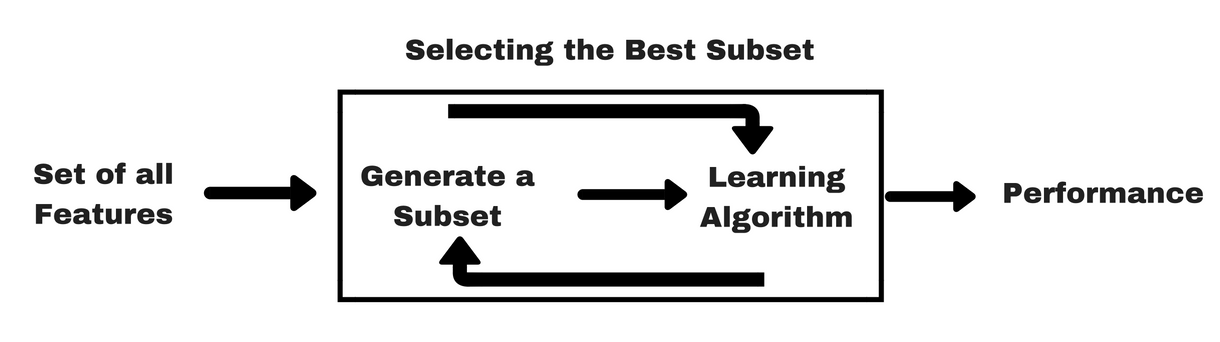


#### 1. Wrapper Method 

**Methods**
1. Forward selection
2. Backward elimination
3. Recursive Feature Elimination (RFE)

In [ ]:
# Set Libs
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE
# https://scikit-learn.org/stable/modules/feature_selection.html#rfe
from sklearn.feature_selection import RFE # recursive feature elimination (RFE)
from sklearn.svm import SVR

##### Top 22 Variables recommened by RFE
    1	familysize_log
    2	agemedian
    3	incomehouseholdmedian_log
    4	density_log
    5	raceblack_log
    6	educationcollegeorabove
    7	population_log
    8	laborforceparticipation_sqrt
    9	cdr2014_log
    10	raceasian_log
    11	cdr2015_log
    12	female_sqrt
    13	male_reciprocal
    14	incomehouseholdsixfigure_log
    15	proglength
    16	homevalue_log
    17	homeownership
    18	cohort2015_log
    19	cohort2014_log
    20	racemultiple_log
    21	married
    22	racenative_reciprocal

#### Forward Selection 

In [79]:
# Import libs 
from sklearn.ensemble import RandomForestRegressor as rfr, RandomForestClassifier as rfc
from sklearn.metrics import roc_auc_score as auc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [80]:
sfs1

NameError: name 'sfs1' is not defined

##### Backward Elimination 

perfomance metric is p-value (metric used to evaluate features)

In [28]:
# Import lib Varience Threshold
import statsmodels.api as sm

In [33]:
# Add a constant to data for the use of OLS model 
X_1 = sm.add_constant(X)

In [74]:
# Fit model and get p_values
model = sm.OLS(y, X_1).fit()

model.pvalues[model.pvalues > 0.49]

cohort2015_log                  0.651282
density_log                     0.584376
homeownership                   0.748585
incomehouseholdsixfigure_log    0.824705
population_log                  0.622965
racemultiple_log                0.613732
racenative_reciprocal           0.515980
racepacific                     0.930684
rentmedian_log                  0.632708
dtype: float64

In [32]:
# Backward Elimination
v = list(X.columns) # List of variables 

pmax = 1 # Max p value to expect 

# Loop for best p-values 
while (len(v) > 0):
    p = [] # empty array of p values 
    
    X_1 = X[v] # create dataset
    X_1 = sm.add_constant(X_1) # add constant for ols model 
    
    model = sm.OLS(y, X_1).fit() # Fit the model 
    
    p = pd.Series(model.pvalues.values[1:], index = v)  # get all p values 
    
    pmax = max(p) # Get max p value 
    vmax = p.idxmax()
    
    # find max value and remove it from var array 
    if pmax > 0.05: 
        v.remove(vmax)
    else:
        break
# Get variables     
print(v)

['agemedian', 'cdr2014_log', 'cdr2015_log', 'cohort2014_log', 'cohort2016_log', 'familysize_log', 'homevalue_log', 'incomehouseholdmedian_log', 'married', 'proglength', 'raceasian_log', 'racewhite', 'private']


Text(0, 0.5, 'Variables Name')

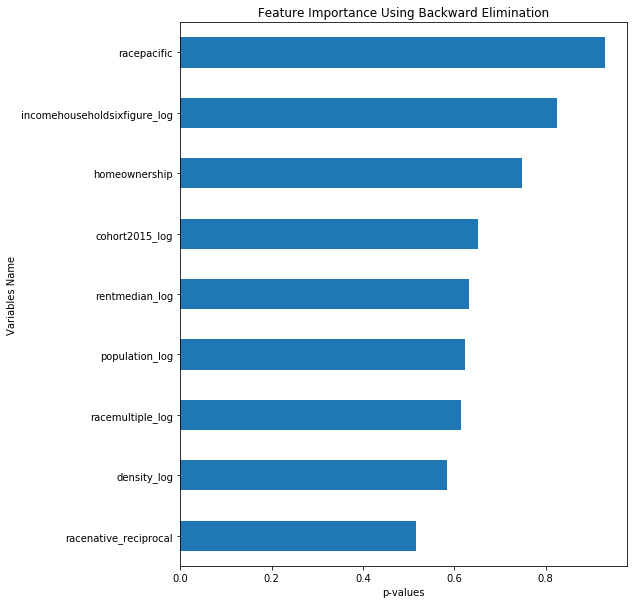

In [77]:
# Create a nice plot for get Backward Elimination
p = model.pvalues[model.pvalues > 0.49] # Remove all p values less than 0.49
p = p.sort_values() # Sort dictionary by values 

# Make plot
plt.rcParams['figure.figsize'] = [8.0, 10.0]  # cerate figure status 
p.plot(kind = 'barh') # Type of Figures 
plt.title('Feature Importance Using Backward Elimination')
plt.xlabel('p-values')
plt.ylabel('Variables Name')

##### Variables Selected using the Backward Elimination method 
   'agemedian', 'cdr2014_log', 'cdr2015_log', 'cohort2014_log', 'cohort2016_log', 'familysize_log', 'homevalue_log', 'incomehouseholdmedian_log', 'married', 'proglength', 'raceasian_log', 'racewhite', 'private'

### 2. Embedded Method 

1. Lasso Regulation:
    Lesso feature selection works by penalizing irrelevant features by making their coeficient 0. This effectively remove these feature in each iteration.
    

Source:

[Feature Selection with sklearn & Pandas](towardsdatascience.com/feature-selection-with-pandas-e3690ad8504)
 

In [34]:
# Import Libs 
from sklearn.linear_model import LassoCV

In [68]:
# Build model for selection 
modL = LassoCV()

# Fit model 
modL.fit(X, y)

C:\Users\marke\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [72]:
# Get recommend variables 
coef = pd.Series(modL.coef_, index = X.columns)

# get vars 
coef[coef != 0].keys()

Index(['proprietary', 'agemedian', 'cdr2014_log', 'cdr2015_log',
       'cohort2014_log', 'cohort2016_log', 'educationcollegeorabove',
       'familysize_log', 'homeownership', 'homevalue_log',
       'incomehouseholdmedian_log', 'married', 'population_log',
       'raceasian_log', 'raceblack_log', 'racemultiple_log',
       'racenative_reciprocal', 'raceother_log', 'racewhite',
       'unemploymentrate_log', 'bachelors', 'firstprofessional',
       'mastersordoctors', 'nondegree', 'nondegree1year', 'nondegree2years',
       'private', 'hbcuCollege', 'notReportedCollege'],
      dtype='object')

Text(0, 0.5, 'Variables Name')

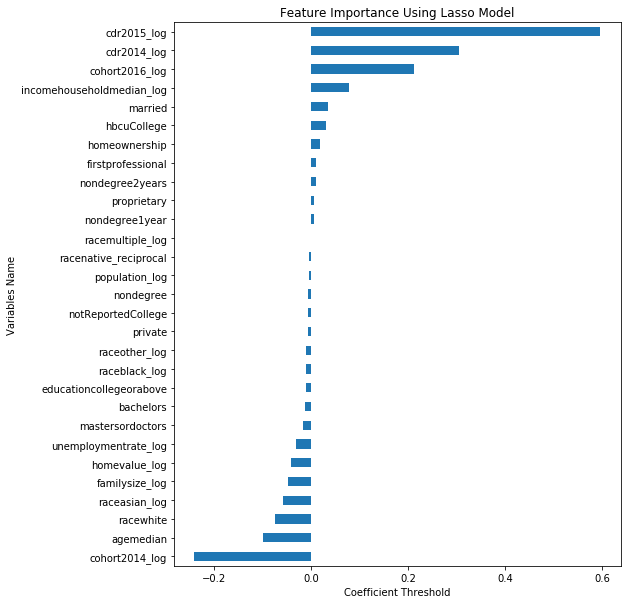

In [78]:
# Create a nice plot for get lasso vars 
coef = coef[coef != 0] # Remove all 0 values 
coef = coef.sort_values() # Sort dictionary by values 

plt.rcParams['figure.figsize'] = [8.0, 10.0]  # cerate figure status 
coef.plot(kind = 'barh') # Type of Figures 
plt.title('Feature Importance Using Lasso Model')
plt.xlabel('Coefficient Threshold')
plt.ylabel('Variables Name')

#### Lasso Regulation Recommended Features 

'proprietary', 'agemedian', 'cdr2014_log', 'cdr2015_log', 'cohort2014_log', 'cohort2016_log', 'educationcollegeorabove', 'familysize_log', 'homeownership', 'homevalue_log', 'incomehouseholdmedian_log', 'married', 'population_log', 'raceasian_log', 'raceblack_log', 'racemultiple_log', 'racenative_reciprocal', 'raceother_log', 'racewhite', 'unemploymentrate_log', 'bachelors', 'firstprofessional', 'mastersordoctors', 'nondegree', 'nondegree1year', 'nondegree2years', 'private', 'hbcuCollege', 'notReportedCollege'

### 3. Filter Method 

a. Filter Method with Pearson Correlation absolute value greater than 0.19. In the litrature this is explained as variables with a weak correlation. 

In [84]:
# Get correllation matrix 
corr = train.corr()

# Get corr only for target variable 'cdr2016_log'. Filter Selected Variables = FSvars
FSvars = corr.cdr2016_log[abs(corr['cdr2016_log']) > 0.19]

# Get Variables Keys
FSvars = list(FSvars.keys())
FSvars.sort()

#### Get variable correlation to each other. Variable which are used to create a regression model can not be correlated to each other. 

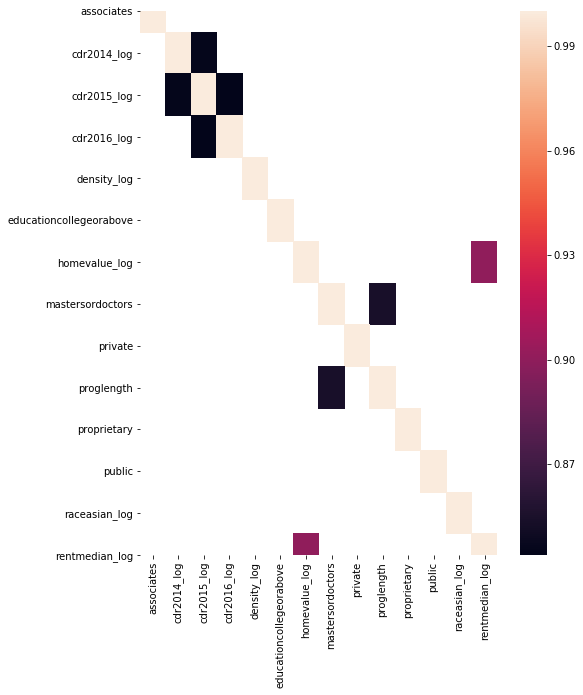

In [85]:
# Get correllation matrix 
FSvars_corr = train[FSvars].corr()

# Create heatmap 
v = FSvars_corr[abs(FSvars_corr) > 0.8]
sb.heatmap(v)

In [89]:
# 'homevalue_log', 'cdr2014_log' and 'mastersordoctors' will be droped 
FSvars.remove('homevalue_log')
FSvars.remove('cdr2014_log')
FSvars.remove('cdr2016_log')
FSvars.remove('mastersordoctors')

In [90]:
# Get listed of recomended variables 
FSvars

['associates',
 'cdr2015_log',
 'density_log',
 'educationcollegeorabove',
 'private',
 'proglength',
 'proprietary',
 'public',
 'raceasian_log',
 'rentmedian_log']

In [94]:
# get new cdr list 
cdr2016_corr = FSvars_corr['cdr2016_log']
cdr2016_corr = cdr2016_corr[abs(cdr2016_corr) > 0.19]
cdr = cdr2016_corr[FSvars]

Text(0, 0.5, 'Variables Name')

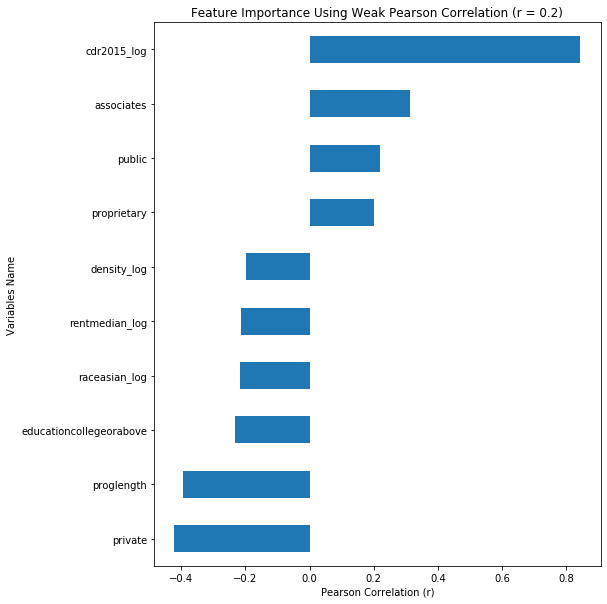

In [97]:
# Create a nice plot for get lasso vars 
corr = cdr.sort_values() # Sort dictionary by values 

plt.rcParams['figure.figsize'] = [8.0, 10.0]  # cerate figure status 
corr.plot(kind = 'barh') # Type of Figures 
plt.title('Feature Importance Using Weak Pearson Correlation (r = 0.2)')
plt.xlabel('Pearson Correlation (r)')
plt.ylabel('Variables Name')

#### Filter Method Summary 

The following varaible are recommened when feature selecton is done using the filter method and pearson correlation coefecient;    

*'associates', 'cdr2015_log', 'density_log', 'educationcollegeorabove', 'private',  'proglength', 'proprietary', 'public', 'raceasian_log', 'rentmedian_log'*

### No Feature Selection

### With Feature Selection